# Using PCA to study the Ising model phase transition

Notebook based on the paper:

**Discovering phases, phase transitions, and crossovers through unsupervised machine learning: A critical examination.** ([Link](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.062122)) 

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
import pickle,os

In [2]:
#plt.rcParams['figure.figsize'] = [6.32, 5.11]
#plt.rcParams['figure.constrained_layout.use'] = True

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelpad'] = 15

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['lines.markersize'] = 9
plt.rcParams['lines.linewidth'] = 2

In [3]:
L = 40
samples_number = 10000
temperatures = np.arange(0.25, 4.01, 0.25)

In [4]:
data = pickle.load(open('Ising2DFM_reSample_L40_T=All.pkl','rb'))
X = np.unpackbits(data).astype(int).reshape(-1,L * L)

In [5]:
temp_val = np.hstack([np.repeat(temp, samples_number) for temp in temperatures])
rand_idx = np.random.choice(X.shape[0], size=8000, replace=False)

In [6]:
X_reduced = X[rand_idx]
tval = temp_val[rand_idx]

In [7]:
X_reduced = np.where(X_reduced==0, -1, X_reduced)

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_reduced)

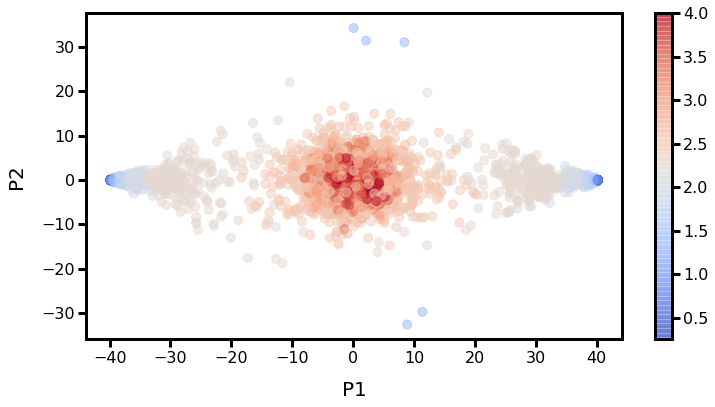

In [9]:
# Plot first and second principal component.

plt.figure(figsize=[12,6])

plt.scatter(X_pca[:,0], X_pca[:,1], c=tval, cmap='coolwarm', alpha=0.5)

plt.colorbar()
plt.ylabel('P2')
plt.xlabel('P1')

plt.show()

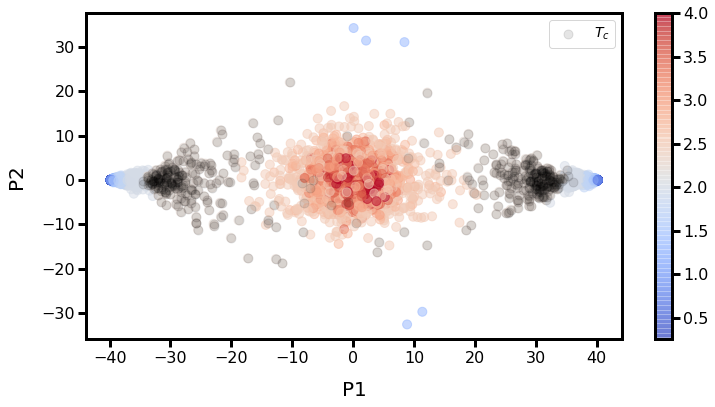

In [10]:
# Plot first and second principal component.

plt.figure(figsize=[12,6])

plt.scatter(X_pca[:,0], X_pca[:,1], c=tval, cmap='coolwarm', alpha=0.5)

plt.colorbar()
plt.ylabel('P2')
plt.xlabel('P1')

plt.scatter(X_pca[temp_val[rand_idx] == 2.25, 0], X_pca[temp_val[rand_idx] == 2.25, 1],
            c='black', alpha=0.1, label=r'$T_c$')

plt.legend()

plt.show()

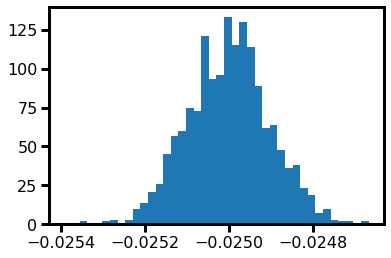

In [11]:
# First principal component distribution.

#plt.figure(figsize=[8,4])

plt.hist(pca.components_[0], bins=40)

plt.show()

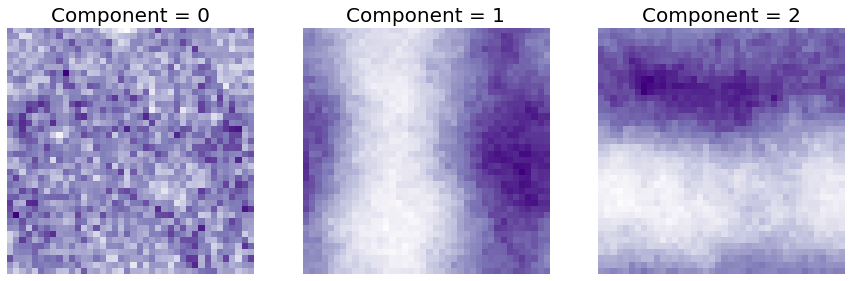

In [12]:
# Plot of three principal component.

plt.figure(figsize=[15,6])

plt.subplot(131)

plt.imshow(np.reshape(np.reshape(pca.components_[0,:] , (1, L**2)), (L, L)),
           origin='lower', cmap='Purples')

plt.title('Component = ' + str(0))
plt.axis(False)

plt.subplot(132)

plt.imshow(np.reshape(np.reshape(pca.components_[1,:] , (1, L**2)), (L, L)),
           origin='lower', cmap='Purples')

plt.title('Component = ' + str(1))
plt.axis(False)

plt.subplot(133)

plt.imshow(np.reshape(np.reshape(pca.components_[2,:] , (1, L**2)), (L, L)),
           origin='lower', cmap='Purples')

plt.title('Component = ' + str(2))
plt.axis(False)

plt.show()

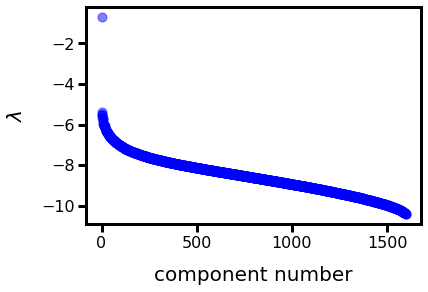

In [13]:
# Eigenvalues ratio.

#plt.figure(figsize=[6,4])

plt.plot(np.log(pca.explained_variance_ratio_), 'bo', alpha=0.5)

plt.ylabel(r'$\lambda$')
plt.xlabel('component number')
plt.show()

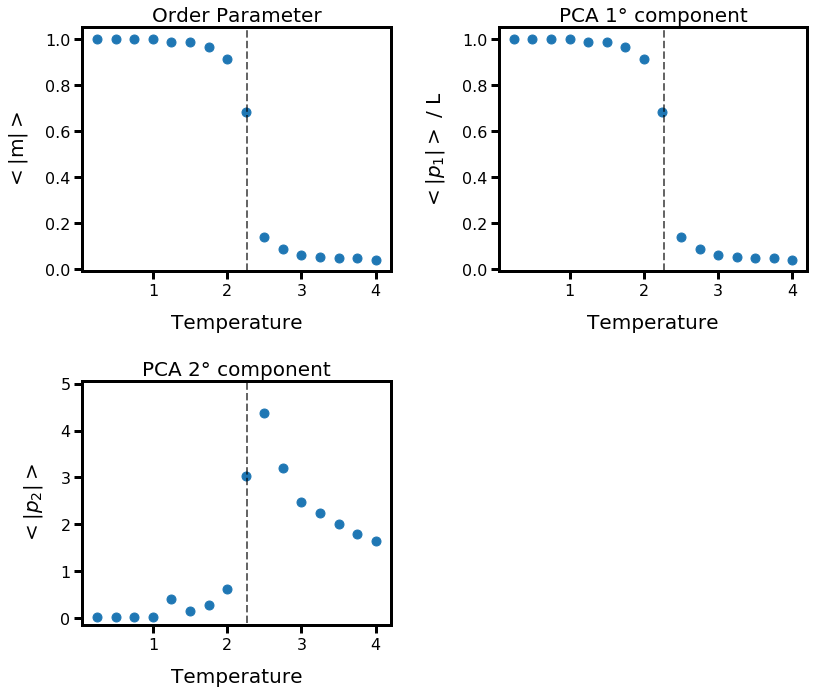

In [14]:
temp = np.unique(tval)
plt.rcParams['figure.constrained_layout.use'] = False
plt.figure(figsize=[13, 11])

plt.subplot(221)
comp = 0

aux = [np.mean(np.abs(np.mean(X_reduced[tval == t, :], axis=1))) for t in temp]

plt.scatter(temp, aux)
plt.plot(np.repeat(2.2691, 121), np.arange(-0.1, 1.1, 0.01), 'k--', alpha=0.6)
plt.ylim(-0.01, 1.05)
plt.title('Order Parameter')
plt.ylabel(r'$<$|m|$>$')
plt.xlabel('Temperature')

plt.subplot(222)
comp = 0

aux1 = pca.components_[comp]  / np.float32(L)

aux = [np.mean(np.abs(np.sum(X_reduced[tval == t, :] * aux1, axis=1))) for t in temp]

plt.scatter(temp, aux)
plt.plot(np.repeat(2.2691, 121), np.arange(-0.1, 1.1, 0.01), 'k--', alpha=0.6)
plt.ylim(-0.01, 1.05)
plt.title('PCA 1° component')
plt.ylabel(r'$<|p_1|>$ / L')
plt.xlabel('Temperature')

plt.subplot(223)
comp = 1

aux1 = pca.components_[comp]

aux = [np.mean(np.abs(np.sum(X_reduced[tval == t, :] * aux1, axis=1))) for t in temp]

plt.scatter(temp, aux)
plt.plot(np.repeat(2.2691, 820), np.arange(-0.1, 8.1, 0.01), 'k--', alpha=0.6)
plt.ylim(-0.15, 5.05)
plt.title('PCA 2° component')
plt.ylabel(r'$<|p_2|>$')
plt.xlabel('Temperature')

plt.subplots_adjust(hspace=0.45, wspace=0.35)
plt.show()

In [15]:
xcenter, ypred, _ = k_means(X_pca ,n_clusters=3)
cc = np.mean(xcenter, axis=1)

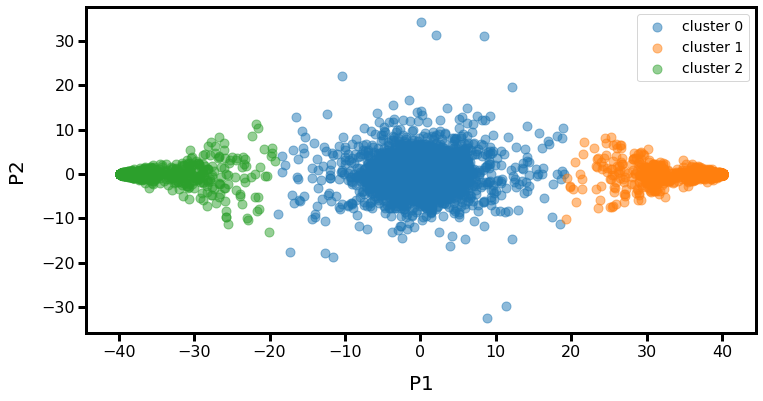

In [19]:
plt.figure(figsize=[12,6])

for pred in np.unique(ypred):
    plt.scatter(X_pca[ypred == pred,0], X_pca[ypred == pred,1], label='cluster %i'%pred, alpha=0.5)

    
plt.legend()
plt.ylabel('P2')
plt.xlabel('P1')

plt.show()

In [17]:
print('Cluster centers:\n')
for i, c in enumerate(cc):
    print('cluster ' + str(i) + ': ' + str(c))

Cluster centers:

cluster 0: 0.0005817448196337579
cluster 1: 0.023434481682551144
cluster 2: -0.024211801418186452
